In [80]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import nsepy
from datetime import date
from nsepy import get_history

In [2]:
infy = get_history(symbol='INFY',
                   start=date(2015,1,1),
                   end=date(2016,12,31))

tcs = get_history(symbol='TCS',
                   start=date(2015,1,1),
                   end=date(2016,12,31))

niftyit = get_history(symbol='NIFTYIT',index = True,
                   start=date(2015,1,1),
                   end=date(2016,12,31))

In [14]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [8]:
def mA(x):
    x['date'] = x.index
    x['date'] = pd.to_datetime(x['date'])
    x['date'] = x['date'].dt.date
    x.index = pd.to_datetime(x.index)
    global x_close
    x_close = x['Close'].resample('W-SAT', how='last')
    x_close = pd.DataFrame(x_close)
    MA_weeks = [4,16,28,40,52]
    for ma in MA_weeks:
        column_name = 'MA for %s weeks' %(str(ma))
        x_close[column_name] = pd.rolling_mean(x_close['Close'],ma)

In [9]:
mA(tcs)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
  if sys.path[0] == '':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=16,center=False).mean()
  if sys.path[0] == '':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=28,center=False).mean()
  if sys.path[0] == '':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed

In [10]:
tcs_weekly=x_close.copy()

In [12]:
tcs_weekly.head()

,Close,MA for 4 weeks,MA for 16 weeks,MA for 28 weeks,MA for 40 weeks,MA for 52 weeks
Date,,,,,,
2015-01-03,2579.45,NaN,NaN,NaN,NaN,NaN
2015-01-10,2512.30,NaN,NaN,NaN,NaN,NaN
2015-01-17,2532.15,NaN,NaN,NaN,NaN,NaN
2015-01-24,2503.60,2531.875,NaN,NaN,NaN,NaN
2015-01-31,2482.05,2507.525,NaN,NaN,NaN,NaN


In [16]:
mA(infy)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
  if sys.path[0] == '':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=16,center=False).mean()
  if sys.path[0] == '':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=28,center=False).mean()
  if sys.path[0] == '':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed

In [17]:
infy_weekly = x_close.copy()

,Close,MA for 4 weeks,MA for 16 weeks,MA for 28 weeks,MA for 40 weeks,MA for 52 weeks
Date,,,,,,
2015-01-03,2013.20,NaN,NaN,NaN,NaN,NaN
2015-01-10,2074.45,NaN,NaN,NaN,NaN,NaN
2015-01-17,2118.30,NaN,NaN,NaN,NaN,NaN
2015-01-24,2215.05,2105.250,NaN,NaN,NaN,NaN
2015-01-31,2141.90,2137.425,NaN,NaN,NaN,NaN


In [19]:
mA(niftyit)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  import sys
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()
  if sys.path[0] == '':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=16,center=False).mean()
  if sys.path[0] == '':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=28,center=False).mean()
  if sys.path[0] == '':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed

In [20]:
niftyit_weekly = x_close.copy()

In [21]:
print(tcs_weekly.head())
print(infy_weekly.head())
print(niftyit_weekly.head())

              Close  MA for 4 weeks  MA for 16 weeks  MA for 28 weeks  \
Date                                                                    
2015-01-03  2579.45             NaN              NaN              NaN   
2015-01-10  2512.30             NaN              NaN              NaN   
2015-01-17  2532.15             NaN              NaN              NaN   
2015-01-24  2503.60        2531.875              NaN              NaN   
2015-01-31  2482.05        2507.525              NaN              NaN   

            MA for 40 weeks  MA for 52 weeks  
Date                                          
2015-01-03              NaN              NaN  
2015-01-10              NaN              NaN  
2015-01-17              NaN              NaN  
2015-01-24              NaN              NaN  
2015-01-31              NaN              NaN  
              Close  MA for 4 weeks  MA for 16 weeks  MA for 28 weeks  \
Date                                                                    
2015-01-03  2

In [22]:
#price shock calculation of tcs

tcs['dayly_ret'] = (tcs['Close']/tcs['Close'].shift(1))-1
tcs['price_shock'] = np.where(np.logical_or((tcs['Close'].pct_change() > 0.02),
   (tcs['Close'].pct_change()< -.02)),1,0)
tcs['price_shock_direction'] = np.where(tcs['dayly_ret']>0,1,0)

In [23]:
#volume shock calculation of tcs

tcs['volume_change'] = (tcs['Volume']/tcs['Volume'].shift(1))-1
tcs['volume_shock'] = np.where(np.logical_or((tcs['Volume'].pct_change() > 0.1),
   (tcs['Volume'].pct_change()< -.1)),1,0)
tcs['volume_shock_direction'] = np.where(tcs['volume_change']>0,1,0)

In [25]:
#price shock without volume shock of tcs
tcs['price_shock_only'] = np.where(np.logical_and((tcs['price_shock'] == 1),
   (tcs['volume_shock'] == 0)),1,0)

In [26]:
tcs.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Deliverable Volume,%Deliverble,date,dayly_ret,price_shock,price_shock_direction,volume_change,volume_shock,volume_shock_direction,price_shock_only
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,...,52870,0.2883,2015-01-01,NaN,0,0,NaN,0,0,0
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,...,309350,0.6683,2015-01-02,0.013317,0,1,1.523621,1,1,0
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,...,456728,0.5207,2015-01-05,-0.015197,0,0,0.894962,1,1,0
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,...,714306,0.5894,2015-01-06,-0.036866,1,0,0.381670,1,1,0
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,...,886368,0.6724,2015-01-07,-0.011812,0,0,0.087693,0,1,0


In [27]:
#price shock calculation of infy

infy['dayly_ret'] = (infy['Close']/infy['Close'].shift(1))-1
infy['price_shock'] = np.where(np.logical_or((infy['Close'].pct_change() > 0.02),
   (infy['Close'].pct_change()< -.02)),1,0)
infy['price_shock_direction'] = np.where(infy['dayly_ret']>0,1,0)

#volume shock calculation of infy

infy['volume_change'] = (infy['Volume']/infy['Volume'].shift(1))-1
infy['volume_shock'] = np.where(np.logical_or((infy['Volume'].pct_change() > 0.1),
   (infy['Volume'].pct_change()< -.1)),1,0)
infy['volume_shock_direction'] = np.where(infy['volume_change']>0,1,0)

#price shock without volume shock of infy
infy['price_shock_only'] = np.where(np.logical_and((infy['price_shock'] == 1),
   (infy['volume_shock'] == 0)),1,0)

In [28]:
infy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Deliverable Volume,%Deliverble,date,dayly_ret,price_shock,price_shock_direction,volume_change,volume_shock,volume_shock_direction,price_shock_only
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,...,258080,0.5154,2015-01-01,NaN,0,0,NaN,0,0,0
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,...,1249104,0.7371,2015-01-02,0.019652,0,1,2.384483,1,1,0
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,...,1830962,0.7370,2015-01-05,-0.008593,0,0,0.466001,1,1,0
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,...,1772070,0.7332,2015-01-06,-0.020893,1,0,-0.027142,0,0,1
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,...,1317720,0.7270,2015-01-07,0.004785,0,1,-0.250059,1,0,0


In [32]:
#price shock calculation of niftyit

niftyit['dayly_ret'] = (niftyit['Close']/niftyit['Close'].shift(1))-1
niftyit['price_shock'] = np.where(np.logical_or((niftyit['Close'].pct_change() > 0.02),
   (niftyit['Close'].pct_change()< -.02)),1,0)
niftyit['price_shock_direction'] = np.where(niftyit['dayly_ret']>0,1,0)

#volume shock calculation of niftyit

niftyit['volume_change'] = (niftyit['Volume']/niftyit['Volume'].shift(1))-1
niftyit['volume_shock'] = np.where(np.logical_or((niftyit['Volume'].pct_change() > 0.1),
   (niftyit['Volume'].pct_change()< -.1)),1,0)
niftyit['volume_shock_direction'] = np.where(niftyit['volume_change']>0,1,0)

#price shock without volume shock of niftyit
niftyit['price_shock_only'] = np.where(np.logical_and((niftyit['price_shock'] == 1),
   (niftyit['volume_shock'] == 0)),1,0)

In [33]:
niftyit.head()

,Open,High,Low,Close,Volume,Turnover,date,dayly_ret,price_shock,price_shock_direction,volume_change,volume_shock,volume_shock_direction,price_shock_only
Date,,,,,,,,,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09,2015-01-01,NaN,0,0,NaN,0,0,0
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09,2015-01-02,0.013945,0,1,1.356220,1,1,0
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10,2015-01-05,-0.010864,0,0,-0.114629,1,0,0
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10,2015-01-06,-0.025661,1,0,0.412928,1,1,0
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10,2015-01-07,-0.004006,0,0,-0.122996,1,0,0


In [34]:
tcs_weekly.head()

,Close,MA for 4 weeks,MA for 16 weeks,MA for 28 weeks,MA for 40 weeks,MA for 52 weeks
Date,,,,,,
2015-01-03,2579.45,NaN,NaN,NaN,NaN,NaN
2015-01-10,2512.30,NaN,NaN,NaN,NaN,NaN
2015-01-17,2532.15,NaN,NaN,NaN,NaN,NaN
2015-01-24,2503.60,2531.875,NaN,NaN,NaN,NaN
2015-01-31,2482.05,2507.525,NaN,NaN,NaN,NaN


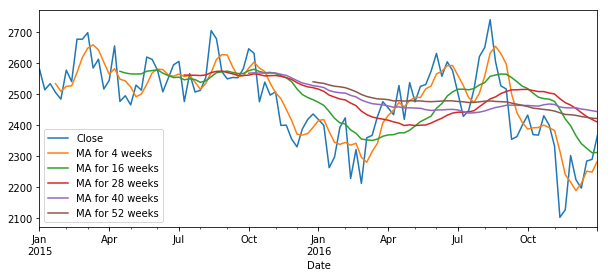

In [39]:
tcs_weekly[['Close','MA for 4 weeks','MA for 16 weeks','MA for 28 weeks','MA for 40 weeks','MA for 52 weeks']].plot(subplots=False,figsize=(10,4))
plt.show()

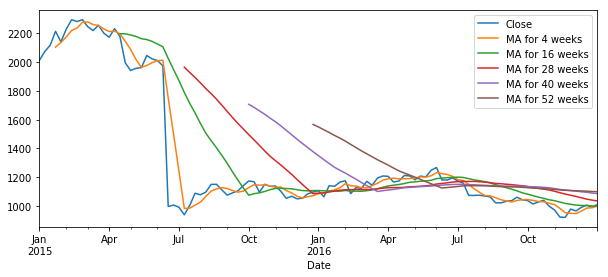

In [40]:
infy_weekly[['Close','MA for 4 weeks','MA for 16 weeks','MA for 28 weeks','MA for 40 weeks','MA for 52 weeks']].plot(subplots=False,figsize=(10,4))
plt.show()

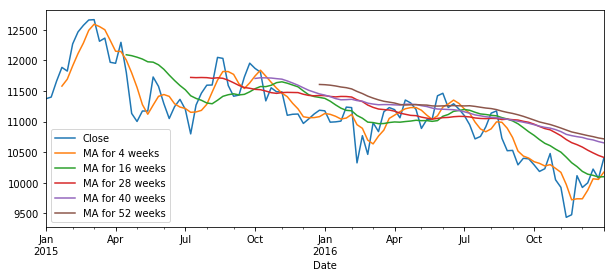

In [41]:
niftyit_weekly[['Close','MA for 4 weeks','MA for 16 weeks','MA for 28 weeks','MA for 40 weeks','MA for 52 weeks']].plot(subplots=False,figsize=(10,4))
plt.show()

Model Building and Testing for TCS

In [42]:
#model building
x_close = tcs.Close.values

X_train = []
y_train = []
for i in range(10, 495):
    X_train.append(x_close[i-10:i])
    y_train.append(x_close[i])

X_train, y_train = np.array(X_train), np.array(y_train)

tcs_train_x=X_train[:-30]
tcs_train_y=y_train[:-30]

tcs_test_x=X_train[-30:]
tcs_test_y=y_train[-30:]

In [56]:
tcs_train_x[:5]

array([[2545.55, 2579.45, 2540.25, 2446.6 , 2417.7 , 2443.8 , 2512.3 ,
        2509.7 , 2497.9 , 2521.95],
       [2579.45, 2540.25, 2446.6 , 2417.7 , 2443.8 , 2512.3 , 2509.7 ,
        2497.9 , 2521.95, 2539.1 ],
       [2540.25, 2446.6 , 2417.7 , 2443.8 , 2512.3 , 2509.7 , 2497.9 ,
        2521.95, 2539.1 , 2532.15],
       [2446.6 , 2417.7 , 2443.8 , 2512.3 , 2509.7 , 2497.9 , 2521.95,
        2539.1 , 2532.15, 2511.  ],
       [2417.7 , 2443.8 , 2512.3 , 2509.7 , 2497.9 , 2521.95, 2539.1 ,
        2532.15, 2511.  , 2500.45]])

In [87]:

import random
random.seed(400)
for i in [10,20,30]:
    for j in [20,30,40]:
        from sklearn.ensemble import RandomForestRegressor
        random.seed(400)
        tcs_rf=RandomForestRegressor(n_estimators=i,max_depth=j,random_state=400,bootstrap = True,oob_score=True)
        tcs_rf.fit(tcs_train_x,tcs_train_y)
        print('for ' + str(i) + ' estimators' + ' and ' + str(j) + ' depth, oob score is = '+ str(tcs_rf.oob_score_) )
        tcs_pred=tcs_rf.predict(tcs_test_x)
        from sklearn.metrics import mean_squared_error
        print("Meand Squared Error is:")
        print(mean_squared_error(tcs_test_y,tcs_pred))

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


for 10 estimators and 20 depth, oob score is = -5.274158488642439
Meand Squared Error is:
2344.070693333332
for 10 estimators and 30 depth, oob score is = -5.273098385823273
Meand Squared Error is:
2344.070693333332
for 10 estimators and 40 depth, oob score is = -5.273098385823273
Meand Squared Error is:
2344.070693333332
for 20 estimators and 20 depth, oob score is = 0.8884846475251492
Meand Squared Error is:
1565.7209202083368
for 20 estimators and 30 depth, oob score is = 0.8888521407970916
Meand Squared Error is:
1565.7209202083368
for 20 estimators and 40 depth, oob score is = 0.8888521407970916
Meand Squared Error is:
1565.7209202083368
for 30 estimators and 20 depth, oob score is = 0.892508046284872
Meand Squared Error is:
1508.8176038889046
for 30 estimators and 30 depth, oob score is = 0.8927509587638961
Meand Squared Error is:
1508.8176038889046
for 30 estimators and 40 depth, oob score is = 0.8927509587638961
Meand Squared Error is:
1508.8176038889046


In [58]:
from sklearn.linear_model import LinearRegression
tcs_lm=LinearRegression()
tcs_lm.fit(tcs_train_x,tcs_train_y)

from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(tcs_lm,parameters, cv=None)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
grid.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [88]:
# building and checking mean squared error for Random Forest Ensemble Model
tcs_rf=RandomForestRegressor(n_estimators=100,max_depth=62,random_state=400,oob_score=True)
tcs_rf.fit(tcs_train_x,tcs_train_y)
print(tcs_rf.oob_score_)
tcs_pred=tcs_rf.predict(tcs_test_x)


from sklearn.metrics import mean_squared_error
print(mean_squared_error(tcs_test_y,tcs_pred))

0.9042247150423833
1446.04400674164


In [73]:
# building and checking mean squared error for LinearRegression Model

tcs_grid_lm = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
tcs_grid_lm.fit(tcs_train_x,tcs_train_y)
tcs_pred=tcs_grid_lm.predict(tcs_test_x)


from sklearn.metrics import mean_squared_error
print(mean_squared_error(tcs_test_y,tcs_pred))

924.2804780814113


Since the LinearRegression Model has given the MSE, we can finalise model using Linear Regression

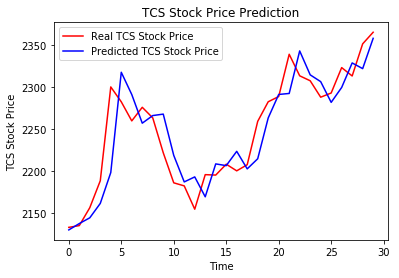

In [75]:
# Visualising the results
plt.plot(tcs_test_y, color = 'red', label = 'Real TCS Stock Price')
plt.plot(tcs_pred, color = 'blue', label = 'Predicted TCS Stock Price')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()


In [77]:
#Predicting tomorrows price based on our model build
last_days = pd.DataFrame(np.array(tcs.Close[-10:].values))
last_days = np.transpose(last_days)
tcs_grid_lm.predict(last_days)

array([2371.0564385])

So, predicted price for next day as per data available .ie the price on jan1,2017 is Rs. 2371.05

In [81]:
tcs2 = get_history(symbol='TCS',
                   start=date(2017,1,1),
                   end=date(2017,1,10))

In [85]:
#actual price on prediced day
print('Actual Price on the Predicted Day:')
tcs2['Close'].iloc[0]

Actual Price on the Predicted Day:


2361.35